## Instructions

Answer the questions below in the space provided. When you are finished, export your file to html and submit it on ELMS.

Be sure to include appopriate code AND a written response where necessary. 

In [ ]:
from requests import get
import numpy as np
import pandas as pd

# Section I

## Question 1 (2pts)

The code below gives me an error message. What's wrong with it? Is there any way to fix it?

In [ ]:
x = (1,2,3,4)
x[2] = 10

### Answer

x is a tuple, and tuples are immutable in Python. We can convert x to a list and re-assign the value, then convert it back to a tuple.

In [ ]:
x = list(x)
x[2] = 10
x = tuple(x)
x

## Question 2 (4pts)
The Cook Political Report measures the "partisan lean" of U.S. Congressional districts. A figure like "R+10" indicates that a district is about 10 percentage points more Republican than the national average. And a figure like "D+10" means that a district is 10 points more Democratic. 

Write a **loop or list comprehension** that converts the list below to numeric values. **Districts that lean Republican should have a positive numeric value, and districts that lean more Democratic should have a positive value.** So "R+15" should become "15", and "D+15" becomes "-15"



In [ ]:
cook_pvi = ['R+16', 'R+17','R+19','D+14','R+6','D+24','D+2','D+11']

### Answer

Multiple ways to do this. Here's a version that uses the `replace` method and wraps the result in `int` to convert the output to numeric:

In [ ]:
[int(i.replace("D+", "-").replace("R+", "")) for i in  cook_pvi ]


In [ ]:
# or as a loop
outputs = []
for i in cook_pvi:
    numeric_lean = int(i.replace("D+", "-").replace("R+", ""))
    outputs.append(numeric_lean)


outputs


## Question 3 (4pts)

The code below grabs some data about the 2024 Nobel Peace Prize from the Nobel Prize API. Take a minute to examine the response. How would I access the english language description of the `motivation` part of the `prize` data?

In [ ]:
prize_data = get('https://api.nobelprize.org/2.0/nobelPrize/pea/2024')
prize = prize_data.json()
prize


### Answer

The square brackets indicate that the result is inside a list (even though its a list of length 1), so we've got to go through 5 levels of nesting here to get to the right result:

In [ ]:
# code here

prize[0]["laureates"][0]["motivation"]['en']

# Section II

The code below will get data from the world bank and format it as a data frame. Each row of the resulting dataframe is a single year of U.S. per-capita carbon emissions. Use the space below to examine the first few rows of `emissions_df` before answering the following questions:

The World Bank changed their indicators on October 24! So this URL uses a different indicator





In [ ]:
# Extracting and formatting
url = 'https://api.worldbank.org/v2/country/US/indicator/EN.GHG.CO2.PC.CE.AR5?format=json&per_page=100'
result= get(url)
result_dict = [{
        'country':i['countryiso3code'],
        'date': int(i['date']),
        'percap_emissions': np.float64(i['value'])} for i in result.json()[1]]
emissions_df = pd.DataFrame(result_dict).sort_values(by='date').set_index('date', drop=False)

## Question 4 (2pts)
What is the **unit of analysis** for `emissions_df`? (Choose the best answer)

- A. Carbon emissions
- B. Country-Year
- C. World Bank Data
- D. None of these



### Answer

Each row represents the US in a single year, so the best answer here is probably Country-Year. 

## Question 5 (4pts)

How many missing observations are there for `percap_emissions`? What are the earliest and latest **non-missing** values for that column? Create a new data frame from `emissions_df` that doesn't include any rows with missing data.

You can use `min` and `max` to get the highest and lowest date values. You could also use `sort_index` here and then slice the top and bottom rows, but you might encounter issues if you use `sort_values` because the index name is also `date`.

### Answer

You can get the correct answer here using `.isnull().sum()` or by using `emissions_df.info`. 

We can get only rows with complete data by using the `dropna()` method.

We can find the highest and lowest date values 


In [ ]:
# code: 
emissions_df.isnull().sum()

#emissions_df.info()

In [ ]:
# getting only non-missing observations

emissions_non_missing = emissions_df.dropna()

In [86]:
# show highest and lowest:
print( 
    emissions_non_missing.date.min(),
    emissions_non_missing.date.max() 
     )

1970 2022


In [88]:
# or sort and then slice:
emissions_non_missing.sort_index().iloc[[0, -1]]

,country,date,percap_emissions
date,,,
1970,USA,1970,22.410933
2022,USA,2022,14.564046


## Question 6 (4pts)
Based on these data, are U.S. carbon emissions increasing or decreasing over time? Offer your intepretation of the data and provide a plot or table to support your argument.

### Answer

You can use `percap_emissions.plot.line()` or make a scatterplot




<Axes: xlabel='date'>

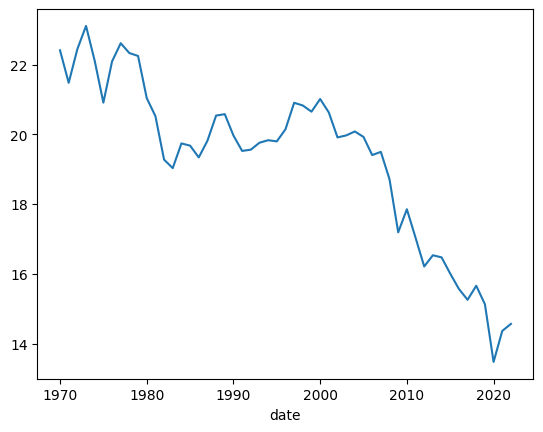

In [93]:
# code:

emissions_df.percap_emissions.plot.line()

<Axes: xlabel='date', ylabel='percap_emissions'>

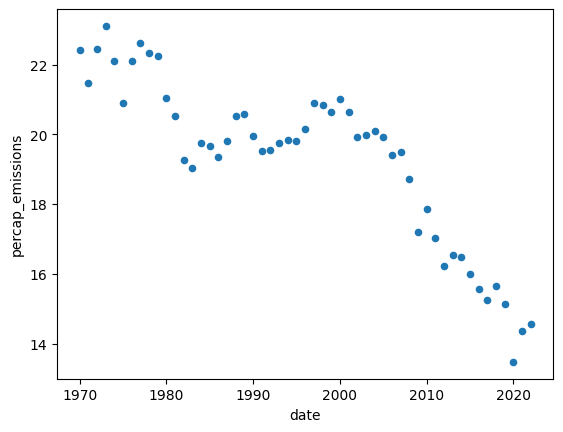

In [94]:

emissions_df.plot.scatter(x='date', y='percap_emissions')

## Question 7 (4pts)

What year saw the greatest drop in CO2 emissions compared to the previous year? Create a new column in `emissions_df` that contains the **change in emissions** from the prior year, and use it to find the year with the greatest drop in emissions. 

(You can use the Pandas `shift` function (<a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html>documentation</a>) to get the prior-year values of `percap_emissions`)


### Answer

Use `shift` to lag `percap_emissions` by one unit, then subtract the current value by the lagged value. Then use `idxmin` to find the index of the biggest drop or use `sort_values` and take the first row

In [99]:
# code

emissions_df['change_in_emissions']  = emissions_df.percap_emissions - emissions_df.percap_emissions.shift(1)


In [100]:
emissions_df.change_in_emissions.idxmin()

2020

In [117]:
emissions_df.sort_values(by='change_in_emissions').iloc[0]

country                      USA
date                        2020
percap_emissions       13.473208
change_in_emissions    -1.654776
Name: 2020, dtype: object

# Section III
The `gtd` data set below contains the following variables:

| Variable          | Description                                                                                                                                                  |
|-------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|
| country           | Country name                                                                                                                                                 |
| democracy_score   | 2020 liberal democracy score from the V-DEM project. Higher values indicate a higher level of democracy. Lower values mean less democratic.                  |
| oil               | ="oil production" if a country was an oil producer in 2020, = "no oil" if a country was not an oil producer in 2020                                          |
| terrorist_attacks | ="terrorist attack" if a country experienced a terrorist attack in 2020,  ="no terrorist attacks" if a country did not experience a terrorist attack in 2020 |


In [118]:
gtd = pd.read_csv("https://raw.githubusercontent.com/Neilblund/APAN/refs/heads/main/gtd_sample.csv")


## Question 8 (4pts)

Some social scientists argue that oil production makes countries less stable and more likely to experience terrorist attacks. 

Using the `gtd` data, produce a table or plot that shows the proportion/percent of oil producing countries that had terrorist attacks compared to the proportion/percent of non-oil producing countries that had terrorist attacks. Do the results appear to support this claim?


### Answer

Probably the easiest way to see this is with a cross tab. But you want to make sure to normalize by the number of oil producing vs non-oil producing countries. So if `oil` is in the rows, we want to normalize on `index` and if `oil` is in the columns, we want to normalize on the columns. (remember: get percentages along whatever dimension includes your independent variable)

The results here suggest that oil producers are more likely to experience terrorist attacks: 34% vs. 66%

In [120]:
# code:

pd.crosstab(gtd['oil'], gtd['terrorist_attacks'], normalize='index')



terrorist_attacks,no terrorist attacks,terrorist attacks
oil,,
no oil,0.653846,0.346154
oil production,0.344828,0.655172


## Question 9 (4pts)

In addition to making countries less stable, many social scientists argue that oil production makes countries less democratic. Produce a table or plot that shows the relationship between oil production and the level of democracy in a country. Briefly discuss your results


### Answer

You can use a `pivot_table` to aggregate `democracy_score` for oil vs. non-oil countries. Notably, the expected relationship here is reversed, although its also not very large in absolute terms. (the relationship here actually does show up if you use a continuous measure of oil production, but you didn't have that option here)

In [124]:
# code:

gtd.pivot_table(values = 'democracy_score',index ='oil', aggfunc='mean')


,democracy_score
oil,
no oil,0.371712
oil production,0.428509
